# Attempting LDA

## 1. Loading Data

In [1]:
# Importing modules
import pandas as pd
import os

os.chdir('..')

# Reading data
chat = pd.read_csv('path to chosen .csv') # Since my directory will be different to yours, you need to specify the path yourself

# Printing data
chat.head()

,Time,User,Message
0,0.0,622f66f8f56f57aef635fd9c59c27c44919720fe,rescwah
1,2.0,538b2ebeaddc8ed6682a0018be0b222a706dfcbf,roovv any pandas in here
2,2.0,0d1de91c68952ebf3f1ba486db302ea295fe7f2a,wowee
3,3.0,2668905d4559fd79169c380cddb17fc271dca77d,rooblank
4,6.0,3ad3649d0e5c5446bb05ad5a015dcd3febe4872c,i love how everything is melting as the sun is...


## 2. Data Cleaning

### 2.1 Removing time column, unecessary for my research

In [2]:
# Remove time column
chat = chat.drop(columns = ['Time'])

chat.head()

,User,Message
0,622f66f8f56f57aef635fd9c59c27c44919720fe,rescwah
1,538b2ebeaddc8ed6682a0018be0b222a706dfcbf,roovv any pandas in here
2,0d1de91c68952ebf3f1ba486db302ea295fe7f2a,wowee
3,2668905d4559fd79169c380cddb17fc271dca77d,rooblank
4,3ad3649d0e5c5446bb05ad5a015dcd3febe4872c,i love how everything is melting as the sun is...


### 2.2 Simple preprocessing

Removing punctuation and making everything lowercase makes the content of chat more amenable for analysis, creating more reliable results

In [3]:
# Load regular expression library
import re

# Remove punctuation
chat['message_processed'] = \
chat['Message'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
chat['message_processed'] = \
chat['message_processed'].map(lambda x: x.lower())

# Print out first row of papers
chat['message_processed'].head()

0                                             rescwah 
1                            roovv any pandas in here 
2                                               wowee 
3                                            rooblank 
4    i love how everything is melting as the sun is...
Name: message_processed, dtype: object

## 3. Exploratory Analysis

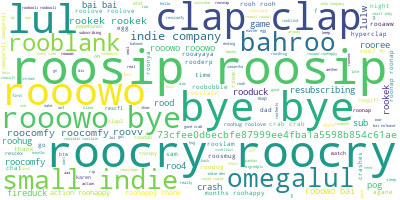

In [4]:
# Import wordlcoud library
from wordcloud import WordCloud

# Join different processed titles together
long_string = ','.join(list(chat['message_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=1000, contour_width=3, contour_color='steelblue')

# Generate wordclouod
wordcloud.generate(long_string)

# Visualise wordcloud
wordcloud.to_image()

## 4. Prepare data for LDA Analysis

### 4.1 Removing stop words and tokenizing the text

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# stop_words.extend(['any', 'words', 'you', 'want']), to customise your own stop words

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
            if word not in stop_words] for doc in texts]


data = chat.message_processed.values.tolist()
data_words = list(sent_to_words(data))

# Remove stop words
data_words = remove_stopwords(data_words)

# Printing tokens
print(data_words[:10])
    

[['rescwah'], ['roovv', 'pandas'], ['wowee'], ['rooblank'], ['love', 'everything', 'melting', 'sun', 'coming'], ['bawklurk'], ['really', 'nice'], ['roovv'], ['golden', 'roopat'], ['max', 'ammo', 'rooderp']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mylea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.2 Convert tokenized object into a corpus and dictionary

In [6]:
import gensim.corpora as corpora

# Create dictionary
id2word = corpora.Dictionary(data_words)

# Create corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])

[[(0, 1)], [(1, 1), (2, 1)], [(3, 1)], [(4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1)], [(11, 1), (12, 1)], [(2, 1)], [(13, 1), (14, 1)], [(15, 1), (16, 1), (17, 1)]]


## 5. LDA Model Training

Keeping all parameters default except for number of topics; play around with these parameters to see if anything changes

 Also think about: weighting, training data etc.

In [7]:
from pprint import pprint

# Number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)

# Print the keyword in the 'n' topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.061*"rooowo" + 0.027*"company" + 0.026*"lul" + 0.025*"small" + '
  '0.022*"indie" + 0.020*"roo" + 0.014*"roosip" + 0.014*"bai" + 0.014*"bahroo" '
  '+ 0.013*"rooaww"'),
 (1,
  '0.055*"bye" + 0.053*"roocry" + 0.045*"clap" + 0.040*"rooowo" + '
  '0.038*"roocomfy" + 0.017*"bai" + 0.016*"roohug" + 0.016*"lulw" + '
  '0.015*"rooh" + 0.014*"rooblank"'),
 (2,
  '0.067*"roosip" + 0.044*"rookek" + 0.022*"crab" + 0.020*"roonap" + '
  '0.018*"roovv" + 0.018*"roohappy" + 0.016*"roolove" + 0.016*"omegalul" + '
  '0.012*"roocomfy" + 0.012*"rood"')]


## 6. Analysing our LDA Model

In [8]:
import pickle
import pyLDAvis
import pyLDAvis.gensim_models # Had to rename .gensim -> .gensim_models

# Visualise the topics
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.097993 -0.066266       1        1  36.064676
2     -0.120260 -0.035208       2        1  33.020680
0      0.022267  0.101474       3        1  30.914644, topic_info=         Term        Freq       Total Category  logprob  loglift
34        bye   76.000000   76.000000  Default  30.0000  30.0000
260    roosip   98.000000   98.000000  Default  29.0000  29.0000
62     roocry   74.000000   74.000000  Default  28.0000  28.0000
35     rooowo  123.000000  123.000000  Default  27.0000  27.0000
123      clap   70.000000   70.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
29     action    5.796425   18.577837   Topic3  -5.2407   0.0092
123      clap    8.639715   70.205907   Topic3  -4.8416  -0.9211
457       fba    6.322228   26.950200   Topic3  -5.1539  -0.2760
4    rooblank    5.179329   27.545396   Topic3  -5.3533  -0.4972
229     rooxd    4.794837   11.728078   Topic3  -5.4304   0.2795

[196 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
29        1  0.161483      action
29        2  0.538276      action
29        3  0.322965      action
543       2  0.911564  activision
59        1  0.442708          ae
...     ...       ...         ...
508       3  0.950866        well
52        2  0.812063       whats
357       3  0.906577         wow
350       3  0.950903        yeah
145       3  0.844252      zombie

[274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])